In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [12]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt


In [13]:


# Obtiene la fecha actual
now = datetime.datetime.now()

# Calcula la fecha 7 años atrás
start = now - datetime.timedelta(days=365*7)

# Formatea la fecha para el formato requerido por yfinance
start = start.strftime('%Y-%m-%d')

# Obtiene los datos históricos del índice DAX desde hace 7 años
dax = yf.download("^GDAXI", start=start)

# Agrega una columna de rendimiento para el índice DAX
dax['return'] = dax['Close'].pct_change()

# Calcula la media móvil de 20 días
dax['ma_20'] = dax['return'].rolling(window=20).mean()

# Calcula la media móvil de 50 días
dax['ma_50'] = dax['return'].rolling(window=50).mean()

# Crea una columna "signal" para indicar cuándo comprar
dax['signal_buy'] = np.where(dax['ma_20'] > dax['ma_50'], 1, 0)

# Crea una columna "signal" para indicar cuándo vender
dax['signal_sell'] = np.where(dax['ma_20'] < dax['ma_50'], 1, 0)

# Imprime los datos para los días en los que se genera una señal de compra
#print(dax[dax['signal_buy'] == 1])




[*********************100%***********************]  1 of 1 completed


Backtesting


In [14]:
# Crea una columna para almacenar las ganancias/pérdidas generadas por la estrategia
dax['strategy_return'] = np.where(dax['signal_buy'] == 1, dax['return'], 0)
dax['strategy_return'].iloc[0] = 0
dax['strategy_return'] = dax['strategy_return'].cumsum()


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


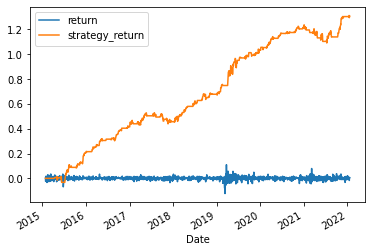

In [15]:
dax[['return', 'strategy_return']].plot()
plt.show()